Hello all! We are going to have a look at the speeches made by all countries at United Nations General Assembly. 
Every year representatives of all UN member states get together for annual sessions. 
Dataset I am using contains text of General debate statements.

Let start by importing the dependencies, required for this analysis:

In [220]:
import pandas as pd
import re
import nltk
import nltk.stem
from nltk.tokenize import word_tokenize, sent_tokenize, PunktSentenceTokenizer
from nltk.corpus import stopwords
from string import punctuation
%matplotlib inline
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Now, we will load the dataset into pandas dataframe and have a look at the data.

In [221]:
data = pd.read_csv("un-general-debates.csv")

In [222]:
data.head()

,session,year,country,text
0,44,1989,MDV,﻿It is indeed a pleasure for me and the member...
1,44,1989,FIN,"﻿\nMay I begin by congratulating you. Sir, on ..."
2,44,1989,NER,"﻿\nMr. President, it is a particular pleasure ..."
3,44,1989,URY,﻿\nDuring the debate at the fortieth session o...
4,44,1989,ZWE,﻿I should like at the outset to express my del...


In [223]:
data.shape

(7507, 4)

In [224]:
data.describe(include="all")

,session,year,country,text
count,7507.000000,7507.000000,7507,7507
unique,NaN,NaN,199,7507
top,NaN,NaN,ALB,"Before beginning my\nstatement, may I on behal..."
freq,NaN,NaN,46,1
mean,49.610763,1994.610763,NaN,NaN
std,12.892155,12.892155,NaN,NaN
min,25.000000,1970.000000,NaN,NaN
25%,39.000000,1984.000000,NaN,NaN
50%,51.000000,1996.000000,NaN,NaN
75%,61.000000,2006.000000,NaN,NaN


 So, there are four variable and 7507 records in the dataset. Speeches from 199 countries from year 1970 to 2015.
 We will start by cleaning the dataset. First, we will remove any record with missing year or country.

In [225]:
#Remove records where country or year is missing.
data = data[data['year'].notnull()]
data = data[data['country'].notnull()]

Now, we will convert all letters to the lower case and remove any special characters and tags and keep only alpha numerical characters 

In [227]:
# data cleaning
# convert text data to lower case
data['text_clean'] = data['text'].str.lower()
def clean(s):    
    # Remove any tags:
    cleaned = re.sub(r"(?s)<.?>", " ", s)
    # Keep only regular chars:
    cleaned = re.sub(r"[^A-Za-z0-9(),*!?\'\`]", " ", cleaned)
    # Remove unicode chars
    cleaned = re.sub("\\\\u(.){4}", " ", cleaned)
    return cleaned.strip()

# clean text
data['text_clean'] = data.text_clean.apply(lambda x: clean(x))

Now, lets break doen cleaned text to the tokens, so, that we can use them in analysis and plotting. Then, remove stop words do not give much meaning to the text.

In [228]:
# tockenize text
data['token'] = data['text_clean'].apply(word_tokenize)
stop_words = set(stopwords.words('english'))
# Adding extra characters (non important) to the stop words.
stop_words.add("'s")
stop_words.add("'")
stop_words.add("-")
stop_words.add("'")
data['clean'] = data['token'].apply(lambda x: [w for w in x if not w in stop_words and not w in punctuation])

Now we can strip down the tokens to their root words.

In [229]:
#remove inflectional endings and get the root word (lemma):
lemmatizer = nltk.stem.WordNetLemmatizer()
data['lemmas'] = [[format(lemmatizer.lemmatize(token)) for token in speech] for speech in data['clean']]
data['lemma_text'] = [' '.join(x) for x in data['lemmas']]

I am interested in only five countries: Canada, USA, India, Germany and UK. Three of these countries I haved lived in for >5 years and other two I want to live in :)

In [230]:
data_ind = data.loc[data['country'] == 'IND']
data_usa = data.loc[data['country'] == 'USA']
data_deu = data.loc[data['country'] == 'DEU']
data_can = data.loc[data['country'] == 'CAN']
data_gbr = data.loc[data['country'] == 'GBR']
data_5 = pd.concat([data_ind, data_usa, data_deu, data_can, data_gbr])

First, I am going to visualize the commonly used words each of these countries. To have an idea what like to focus on

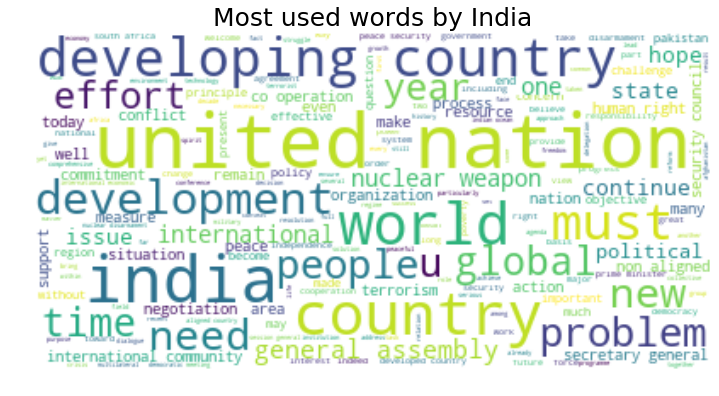

In [231]:
all_words = data_ind.lemma_text.sum()
wordcloud = WordCloud(background_color='white',
                      max_words=4000).generate(all_words)
plt.figure(figsize = (10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Most used words by India" , fontsize=25)
plt.show()

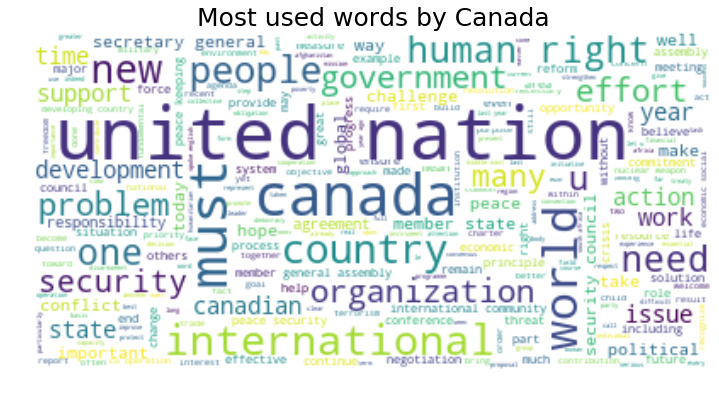

In [232]:
all_words = data_can.lemma_text.sum()
wordcloud = WordCloud(background_color='white',
                      max_words=4000).generate(all_words)
plt.figure(figsize = (10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Most used words by Canada" , fontsize=25)
plt.show()

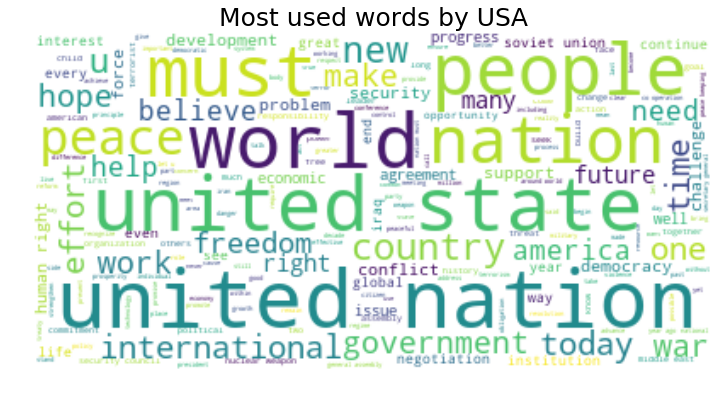

In [233]:
all_words = data_usa.lemma_text.sum()
wordcloud = WordCloud(background_color='white',
                      max_words=4000).generate(all_words)
plt.figure(figsize = (10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Most used words by USA" , fontsize=25)
plt.show() 

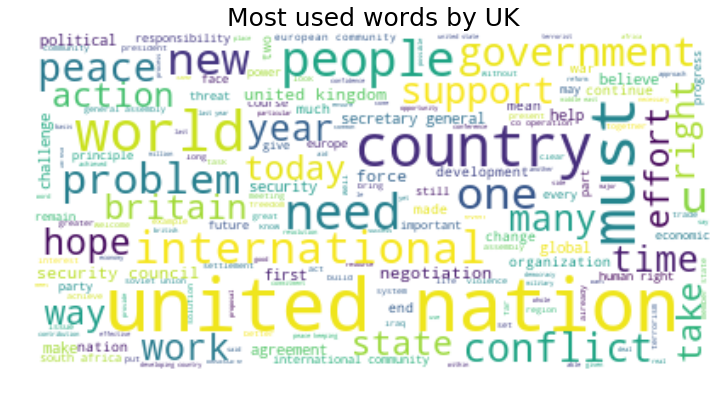

In [234]:
all_words = data_gbr.lemma_text.sum()
wordcloud = WordCloud(background_color='white',
                      max_words=4000).generate(all_words)
plt.figure(figsize = (10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Most used words by UK" , fontsize=25)
plt.show()

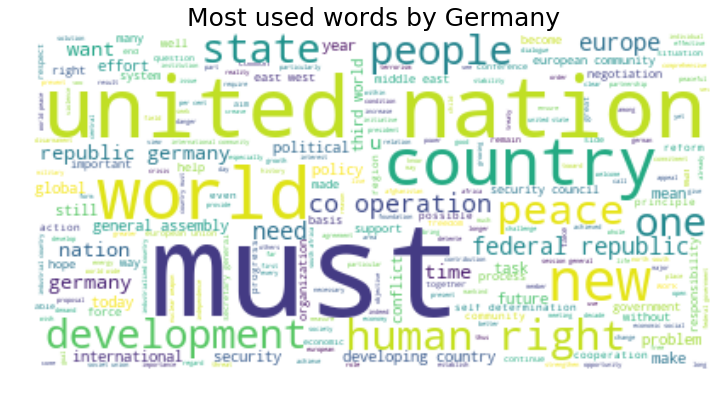

In [235]:
all_words = data_deu.lemma_text.sum()
wordcloud = WordCloud(background_color='white',
                      max_words=4000).generate(all_words)
plt.figure(figsize = (10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Most used words by Germany" , fontsize=25)
plt.show()

Wordcloud is not very useful here. Most used words by all five countries are very similar like United Nations, country, people, nation, international, own country name, world, must. 
Look how assertive Germany is, with use of word MUST.

So, now we will look at the different topics that we are interested in. We are writing a function first, that will help us plot the word used by our country of interest.

In [236]:
# Plot a horizontal bar graph displaying the frequency of a given topic by country
def freqMentioned (df, country_list, topic_list, colors):
    data = df.loc[df['country'].isin(country_list)]

    for i in topic_list:
        data[i] = data['text'].str.contains(i)
        data[i].loc[data[i] == False] = np.nan

    country = country_list[0]
    data_out = pd.DataFrame(data.loc[data['country'] == country].count())
    data_out = (data_out.T)[topic_list]
    
    # sort the columns by summed occurence in countries specified
    countries = country_list.copy()
    countries.remove(country)

    for i in countries:
        a = pd.DataFrame(data.loc[data['country'] == i].count())
        a = (a.T)[topic_list].copy()
        data_out = pd.concat([data_out, a], axis=0)

    dictionary = {}
    
    for i in topic_list:
        dictionary[i] = data_out[i].sum()
        
    sorted_dictionary = sorted(dictionary.items(), key=operator.itemgetter(1), reverse=True)
    data_out = data_out[[i[0] for i in sorted_dictionary]]
    data_out.index = country_list
    data_out.T.plot(kind="barh", width=.6, stacked=True, figsize = (10, len(topic_list)/3), color=colors).legend(bbox_to_anchor=(1, 1))
    
    return data_out

Now, lets start looking the words associated with Climate change/Environment:

,environment,energy,sustainable,climate change,coal,pollution,carbon,global warming,fossil,solar
USA,20,25,8,8,20,7,4,1,2,2
IND,36,25,18,11,6,2,2,0,1,1
GBR,19,16,16,12,9,1,4,4,1,0
DEU,27,30,9,7,2,6,6,1,1,0
CAN,29,16,14,10,8,6,3,1,0,0


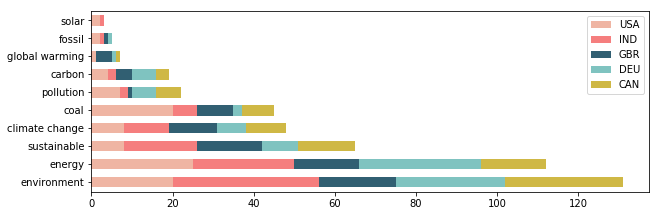

In [237]:
# Climate topics
topics = [ 'coal',  'solar', 'fossil', 'environment', 'energy', 
          'pollution', 'carbon', 'global warming', 'climate change', 'sustainable']
dictionary = {}

for i in topics:    
    dictionary[i] = data_5['year'][data_5['text'].str.contains(i)].count() / len(data) * 100

sorted_dictionary = sorted(dictionary.items(), key=operator.itemgetter(1), reverse=True)
import numpy as np
country_list = ['USA', 'IND', 'GBR', 'DEU', 'CAN']

topics = []
for i in sorted_dictionary:
    if i[1] > 0.01:
        topics.append(i[0])

colors = ['#efb5a3', '#f57e7e', '#315f72', '#7fc3c0', '#cfb845']
freqMentioned(data_5, country_list, topics, colors)

Word climate change is used by all countries with same frequency with Germany lagging a little. Environment is used more by India.
Word 'Coal' and 'Polution' is mainly used by USA. 'Global Warming is used by UK a lot.'

Now we will look at words related to war/peace: 

,peace,war,security,weapon,nuclear,terror,terrorism,nuclear weapons,mass destruction,chemical weapons,civil war,nuclear war,biological weapons
USA,46,46,40,45,40,37,28,32,18,14,7,5,7
IND,46,46,44,42,43,35,30,31,16,6,2,10,5
GBR,45,45,45,32,29,29,23,11,6,10,8,3,0
DEU,43,43,40,38,39,30,25,22,14,16,11,2,3
CAN,46,46,44,37,38,27,25,21,8,15,0,8,3


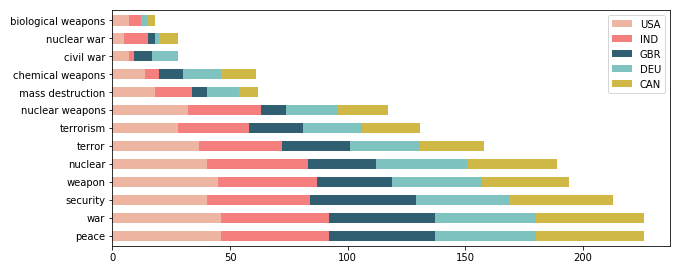

In [239]:
# war topics
topics = [ 'war',  'nuclear', 'weapon', 'peace',  'nuclear weapons', 'chemical weapons',  'nuclear war', 'civil war',
          'security', 'terror', 'terrorism', ' biological weapons', ' mass destruction']
dictionary = {}

for i in topics:    
    dictionary[i] = data_5['year'][data_5['text'].str.contains(i)].count() / len(data) * 100

sorted_dictionary = sorted(dictionary.items(), key=operator.itemgetter(1), reverse=True)
import numpy as np
country_list = ['USA', 'IND', 'GBR', 'DEU', 'CAN']

topics = []
for i in sorted_dictionary:
    if i[1] > 0.01:
        topics.append(i[0])

colors = ['#efb5a3', '#f57e7e', '#315f72', '#7fc3c0', '#cfb845']
freqMentioned(data_5, country_list, topics, colors)

Words like 'War', 'Peace', 'Security', 'weapon', 'terror', and 'Terrorism' are used by all five countries almost equal amount of time.
'Nuclear Weapons' and 'Mass Destruction' are used less by UK in comparison to other four. Word 'Civil War' is used very less bu India and not by Canada

Let us have a look at the topics that covers basic needs of a human: 

,human rights,growth,poverty,violence,energy,food,health,oil,disease,education,...,water,famine,drugs,agriculture,nutrition,infrastructure,inequality,housing,sanitation,transportation
USA,37,34,25,34,25,21,22,22,29,15,...,15,15,7,5,4,5,2,1,1,1
IND,31,35,35,26,25,18,21,14,13,9,...,11,7,7,7,7,8,5,1,3,0
GBR,30,21,23,33,16,17,13,14,12,10,...,9,8,7,5,4,1,3,3,1,0
DEU,38,32,30,28,30,19,6,18,7,14,...,9,2,2,7,1,4,2,2,0,0
CAN,39,21,26,18,16,19,25,9,12,9,...,12,4,7,2,5,2,1,0,0,2


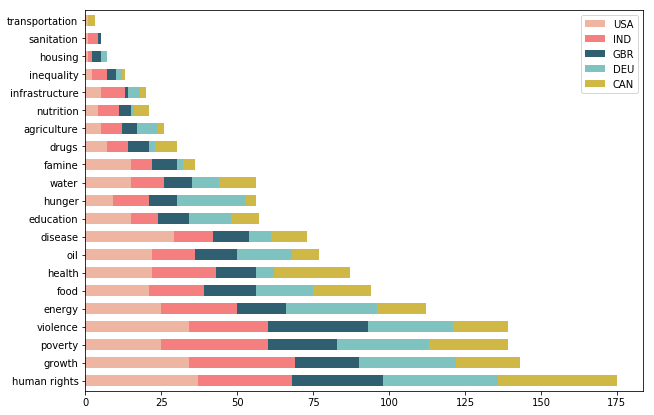

In [240]:
# basic needs topics
topics = ['water', 'famine', 'disease', 'poverty', 'human rights', 
      'energy', 'oil',   'growth', 'inequality', 
          'hunger', 'education', 'health', 'sanitation', 'infrastructure',
          'food', 'nutrition', 'transportation',
          'violence', 'agriculture', 'drugs', ' obesity',
          'housing']
dictionary = {}

for i in topics:    
    dictionary[i] = data_5['year'][data_5['text'].str.contains(i)].count() / len(data) * 100

sorted_dictionary = sorted(dictionary.items(), key=operator.itemgetter(1), reverse=True)
import numpy as np
country_list = ['USA', 'IND', 'GBR', 'DEU', 'CAN']

topics = []
for i in sorted_dictionary:
    if i[1] > 0.01:
        topics.append(i[0])

# colors = ['dodgerblue', 'orange', 'navy', 'lightseagreen', 'r']
colors = ['#efb5a3', '#f57e7e', '#315f72', '#7fc3c0', '#cfb845']
freqMentioned(data_5, country_list, topics, colors)

Words that have been used similarly by all five countries are: Human Rights, Growth, Poverty, Violance, Energy. Germany do not use words like Health, Famine, drugs, Nutrition. 
UK cares less for Infrastructure and canada cares most for Transportation.

Now is the time for Finance/Economy:

,trade,growth,economy,finance,income,bank,inflation,regulation,interest rate
USA,33,34,32,8,5,7,7,5,2
IND,34,35,35,18,10,2,7,7,4
GBR,33,21,26,17,9,6,5,3,4
DEU,26,32,30,10,10,12,8,3,4
CAN,27,21,19,10,4,7,5,1,3


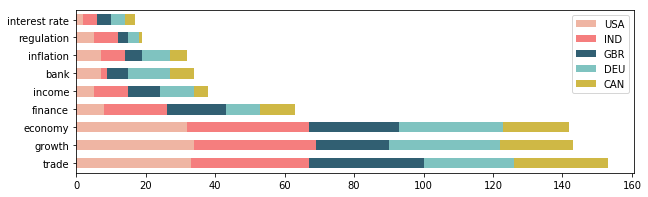

In [241]:
#economy topics
topics = [ 'income', 'economy', 'growth', 'inflation', 'interest rate', 'trade', 
          'regulation', 'bank', 'finance', 'gdp'         
         ]
dictionary = {}

for i in topics:    
    dictionary[i] = data_5['year'][data_5['text'].str.contains(i)].count() / len(data) * 100

sorted_dictionary = sorted(dictionary.items(), key=operator.itemgetter(1), reverse=True)
import numpy as np
country_list = ['USA', 'IND', 'GBR', 'DEU', 'CAN']

topics = []
for i in sorted_dictionary:
    if i[1] > 0.01:
        topics.append(i[0])

colors = ['#efb5a3', '#f57e7e', '#315f72', '#7fc3c0', '#cfb845']
freqMentioned(data_5, country_list, topics, colors)

All countries talk about Trade and Economy frequently. USA and Canada do not give much importance to Income and UK to growth.
India talks about Banks the least and Canada Regulation.

# Sentiment Analysis
Now we will look at the speeches by all five countries and identify the Sentiments associated with all of their speeches.
Next, we will plot count of those sentiments by countries.

In [242]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def analyze_polarity(text):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(text)
    
    #return the overall sentiment rating of the text
    return sentiment_dict["compound"]

def get_sentiment(polarity):    
    
    # decide sentiment as positive, negative and neutral 
    if polarity >= 0.05: 
        sent = "Positive"  
    elif polarity <= - 0.05: 
        sent = "Negative"
    else: 
        sent = "Neutral"

    return sent

In [243]:
#get overall polarity scores of the raw text
data_5['polarity'] = np.array([ analyze_polarity(text) for text in data_5['text'] ])

#get sentiment value for the given polarity
data_5['sentiment'] = np.array([ get_sentiment(pol) for pol in data_5['polarity'] ])

data_5.head()

,session,year,country,text,text_clean,token,clean,lemmas,lemma_text,polarity,sentiment
115,44,1989,IND,﻿\nMy delegation warmly welcomes the assumptio...,my delegation warmly welcomes the assumption b...,"[my, delegation, warmly, welcomes, the, assump...","[delegation, warmly, welcomes, assumption, amb...","[delegation, warmly, welcome, assumption, amba...",delegation warmly welcome assumption ambassado...,0.9997,Positive
169,25,1970,IND,"40.\t Mr. President, I offer you our congratul...","40 mr president, i offer you our congratula...","[40, mr, president, ,, i, offer, you, our, con...","[40, mr, president, offer, congratulations, el...","[40, mr, president, offer, congratulation, ele...",40 mr president offer congratulation election ...,1.0000,Positive
247,68,2013,IND,"Let me first of all congratulate \nyou, Mr. Pr...","let me first of all congratulate you, mr pre...","[let, me, first, of, all, congratulate, you, ,...","[let, first, congratulate, mr, president, elec...","[let, first, congratulate, mr, president, elec...",let first congratulate mr president election p...,0.9995,Positive
434,40,1985,IND,"Sir, I should like to begin by congratulating ...","sir, i should like to begin by congratulating ...","[sir, ,, i, should, like, to, begin, by, congr...","[sir, like, begin, congratulating, unanimous, ...","[sir, like, begin, congratulating, unanimous, ...",sir like begin congratulating unanimous electi...,0.9999,Positive
565,63,2008,IND,"May I first congratulate you, \nSir, on your e...","may i first congratulate you, sir, on your el...","[may, i, first, congratulate, you, ,, sir, ,, ...","[may, first, congratulate, sir, election, pres...","[may, first, congratulate, sir, election, pres...",may first congratulate sir election president ...,0.9980,Positive


In [244]:
temp = data_5.groupby(['country','sentiment'], as_index=False).session.count()
temp.rename(columns={'session':'count'}, inplace=True)
a = (temp.pivot(index='country', columns='sentiment', values='count')).fillna(0)
a['country'] = a.index
a.reset_index(drop=True, inplace=True)

[Text(0, 0, 'CAN'),
 Text(0, 0, 'DEU'),
 Text(0, 0, 'GBR'),
 Text(0, 0, 'IND'),
 Text(0, 0, 'USA')]

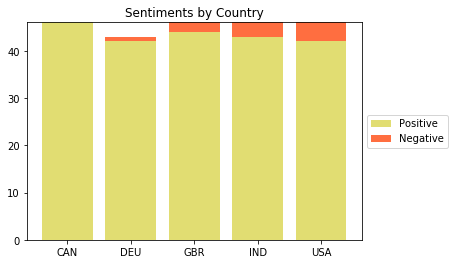

In [245]:
from matplotlib import pyplot as plt
country = a['country'].values
fig, ax = plt.subplots()
ax.bar(a.index, a['Positive'], color = '#e1dd72', label='Positive')
ax.bar(a.index, a['Negative'], color = '#ff6e40',  bottom=a['Positive'],
       label='Negative')
ax.set_title('Sentiments by Country')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xticks(np.arange(len(country)))
ax.set_xticklabels(country)

All the speeches given by Canada in UN assembly have Positive sentiments (well, No surprise there!). USA has most number of Negative speeches but still very little. 
Great to know that all my favourite countries keep their speeches Positive most of the time.
Yayyyyyyyyyy!!!